# Echo State Network

In [1]:
import numpy as np
from tqdm import tqdm
from time import sleep
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN

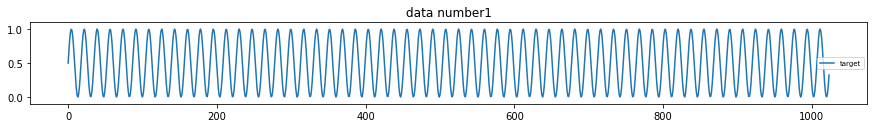

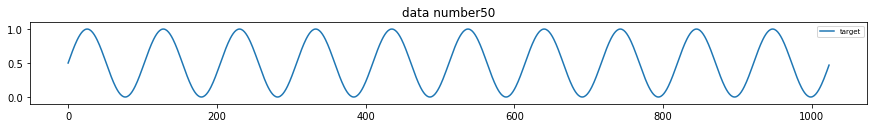

In [2]:
rng = np.random.RandomState(42)
def frequency_generator(K, N):
    C = 1
    frequency = np.zeros((K, N*C, 1))
    z = 0
    n = K+10
    for i in range(K):
        n = n-1
        for j in range(N*C):
            frequency[i][j] = (np.sin(2*z*n/N)+1)/2
            z = z + 2*np.pi
    return frequency

N = 2**11 # signal length
K = 50 # number of signals

data = frequency_generator(K, N)

scale = 2**10
slide = 2**0
view_scale = min(scale, 100)

for i in (0, K-1):
    window_tr = range(int(N/2))
    plt.figure(figsize=(15,1.5))
    plt.plot(data[i][window_tr], label='target')
    plt.legend(fontsize='x-small')
    plt.title('data number{}'.format(i+1))
    plt.ylim([-0.1, 1.1]);

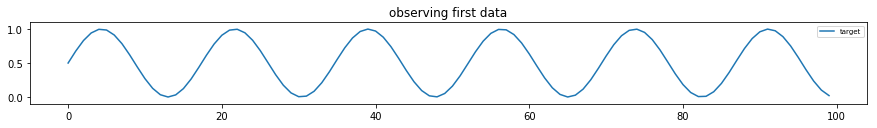

In [3]:
window_tr = range(int(N/40))
plt.figure(figsize=(15,1.5))
plt.plot(data[0][:view_scale], label='target')
plt.legend(fontsize='x-small')
plt.title('observing first data')
plt.ylim([-0.1, 1.1]);

100%|██████████| 10/10 [01:06<00:00,  9.34s/it]


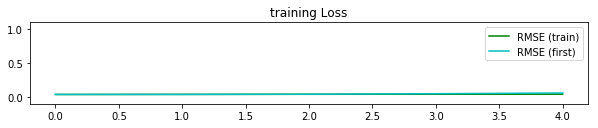

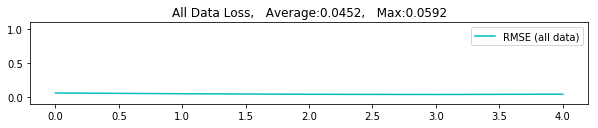

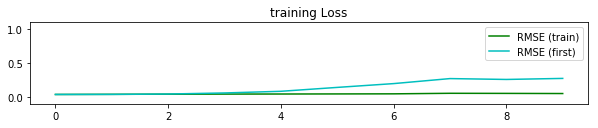

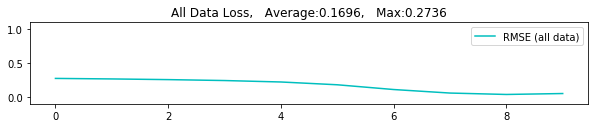

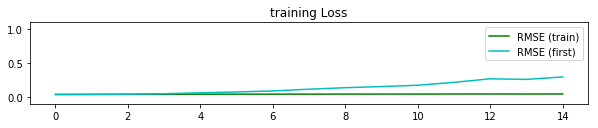

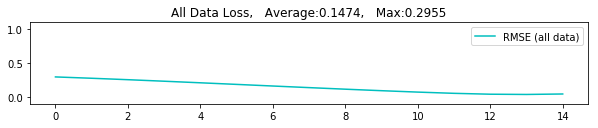

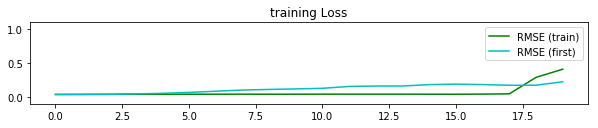

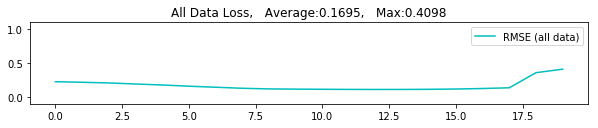

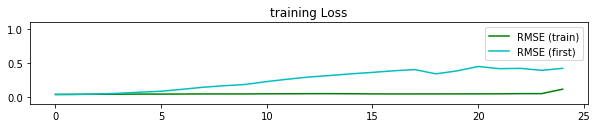

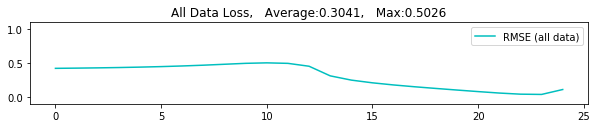

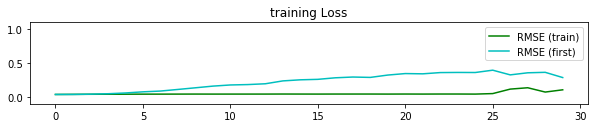

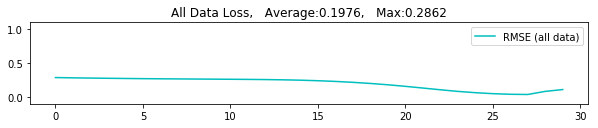

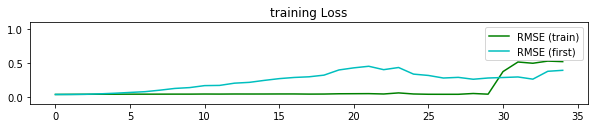

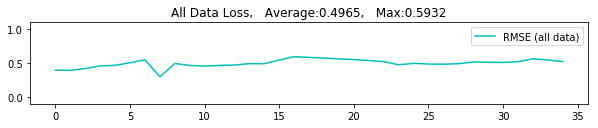

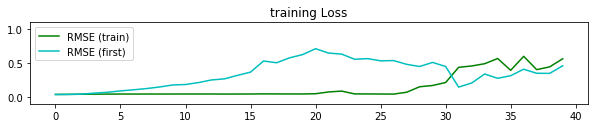

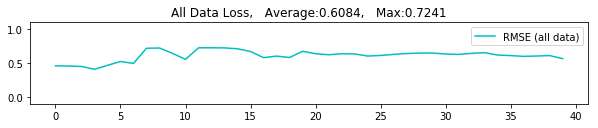

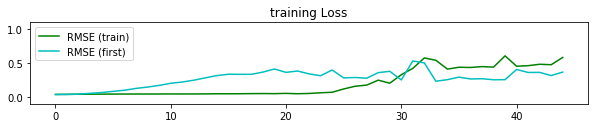

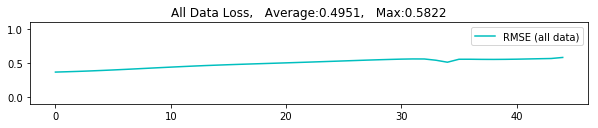

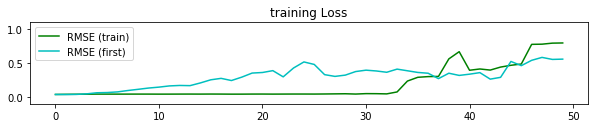

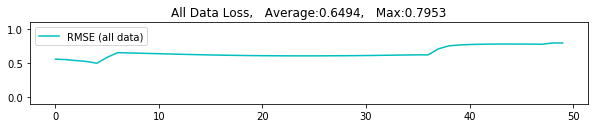

In [4]:
L = 50 # number of learning data

for l in tqdm(range(5, L+1, 5)):
    esn = ESN(n_inputs = 1,
              n_outputs = 1,
              n_reservoir = 300,
              spectral_radius = 0.85,
              sparsity = 0.8,
              teacher_scaling = 1.12,
              teacher_shift = -0.7,
              out_activation = np.tanh,
              inverse_out_activation = np.arctanh,
              random_state = rng)

    RMSE_train = []
    MAE_train  = []
    RMSE_first = []

    for i in range(l):
        esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
        pred_train = esn.predict(data[i][:scale])
        pred_first = esn.predict(data[0][:scale])
        RMSE = np.sqrt(np.mean((pred_train - data[i][slide:slide+scale])**2))
        RMSE_train.append(RMSE)
        RMSE_first.append(np.sqrt(np.mean((pred_first - data[0][slide:slide+scale])**2)))

    # plot loss over time
    plt.figure(figsize=(10, 1.5))
    plt.plot(RMSE_train, 'g', label="RMSE (train)")
    plt.plot(RMSE_first, 'c', label="RMSE (first)")
    plt.legend(fontsize='medium')
    plt.ylim([-0.1, 1.1])
    plt.title('training Loss')

    RMSE_alldata = []
    
    for i in range(l):
        pred_train_check = esn.predict(data[i][:scale])
        RMSE_alldata.append(np.sqrt(np.mean((pred_train_check - data[i][slide:slide+scale])**2)))
    
    average = np.mean(RMSE_alldata)
    maximum = max(RMSE_alldata)

    plt.figure(figsize=(10, 1.5))
    plt.plot(RMSE_alldata, 'c', label="RMSE (all data)")
    plt.legend(fontsize='medium')
    plt.ylim([-0.1, 1.1])
    plt.title('All Data Loss,   Average:{:.4f},   Max:{:.4f}'.format(average, maximum));